In [3]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install diffusers
!pip install transformers
!pip install matplotlib




Looking in indexes: https://download.pytorch.org/whl/cu121


In [4]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


True
NVIDIA GeForce RTX 3050 6GB Laptop GPU


In [5]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch 

In [6]:
!pip show torch

Name: torch
Version: 2.4.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\users\ayush\desktop\docfusion  automated sumarization of multi doc with pdf and latic format\myenv\lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, peft, sentence-transformers, torchaudio, torchvision


In [7]:
model_id="dreamlike-art/dreamlike-photoreal-2.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id , torch_dtype=torch.float16 , use_safetensors=True)
pipe=pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
prompt="""dreamlikeart , create a landscape where a college names ABES IT  is there with metal gates and holding of abesit on top of gate , and a cow is stting in front of that gate """

In [9]:
image = pipe(prompt).images[0]

c:\users\ayush\desktop\docfusion  automated sumarization of multi doc with pdf and latic format\myenv\lib\site-packages\transformers\models\clip\modeling_clip.py:540: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  dreamlikeart , create a landscape where a college names ABES IT  is there with metal gates and holding of abesit on top of gate , and a cow is stting in front of that gate 


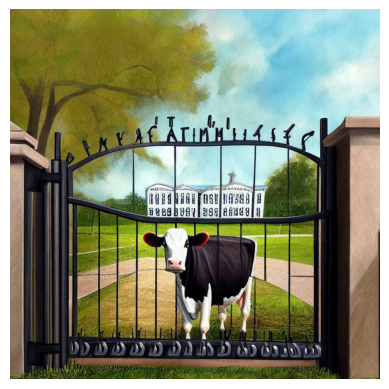

In [10]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [14]:
##finetuning now 
!pip install --upgrade pip

  Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.1.1
    Uninstalling pip-21.1.1:
      Successfully uninstalled pip-21.1.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\AYUSH\\AppData\\Local\\Temp\\pip-uninstall-x3fxvb6k\\pip.exe'
Check the permissions.



In [13]:
!pip install diffusers[training] transformers accelerate safetensors peft


  Using cached Markdown-3.7-py3-none-any.whl (106 kB)
  Using cached google_auth-2.39.0-py2.py3-none-any.whl (212 kB)
  Using cached werkzeug-3.0.6-py3-none-any.whl (227 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl (10 kB)
  Using cached pyasn1_modules-0.4.2-py3-none-any.whl (181 kB)
  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl (24 kB)
  Using cached pyasn1-0.6.1-py3-none-any.whl (83 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Uninstalling protobuf-5.29.3:
      Successfully uninstalled protobuf-5.29.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymilvus 2.5.5 requires setuptools>69, but you have setuptools 56.0.0 which is incompatible.
You should consider upgrading via the 'c:\users\ayush\desktop\docfusion  automated sumarization of multi doc with pdf and latic format\myenv\scripts\python.exe -m pip install --upgrade pip' command.


In [15]:
import torch
from diffusers import StableDiffusionPipeline
from peft import LoraConfig
from torch import nn
import os


In [16]:
model_id = "dreamlike-art/dreamlike-photoreal-2.0"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    use_safetensors=True,
).to("cuda")


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [21]:
from torch.utils.data import Dataset
from PIL import Image

class CustomImageDataset(Dataset):
    def __init__(self, image_folder):
        self.image_folder = image_folder
        self.image_filenames = [file for file in os.listdir(image_folder) if file.endswith(('jpg', 'jpeg', 'png'))]

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_folder, self.image_filenames[idx])
        image = Image.open(img_path).convert("RGB")
        return image

# Replace this with your dataset path
dataset_path = "C:\\Users\\AYUSH\\Desktop\\imggen\\my_custom_data"


dataset = CustomImageDataset(dataset_path)


In [11]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
from transformers import TrainingArguments
from peft import LoraConfig

# LoRA Configuration
lora_config = LoraConfig(
    r=4,
    lora_alpha=16,
    lora_dropout=0.1,
    bias="none",
    task_type="STABLE_DIFFUSION"
)

# Training Arguments
training_args = TrainingArguments(
    output_dir="lora_outputs",
    per_device_train_batch_size=2,
    num_train_epochs=10,
    logging_dir="logs",
    save_steps=50,
    logging_steps=10,
    learning_rate=1e-4,
    report_to="none"  # Disables logging to external tools
)

# Image Transformations
image_transforms = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Custom Dataset Class
class CustomImageDataset(Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_folder = image_folder
        self.image_filenames = [
            file for file in os.listdir(image_folder)
            if file.endswith(('jpg', 'jpeg', 'png'))
        ]
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_folder, self.image_filenames[idx])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

# Replace this with your dataset path
dataset_path = "C:\\Users\\AYUSH\\Desktop\\imggen\\my_custom_data"
dataset = CustomImageDataset(dataset_path, transform=image_transforms)


ValueError: Unrecognized model in dreamlike-art/dreamlike-photoreal-2.0. Should have a `model_type` key in its config.json, or contain one of the following strings in its name: albert, align, altclip, audio-spectrogram-transformer, autoformer, bark, bart, beit, bert, bert-generation, big_bird, bigbird_pegasus, biogpt, bit, blenderbot, blenderbot-small, blip, blip-2, bloom, bridgetower, bros, camembert, canine, chameleon, chinese_clip, chinese_clip_vision_model, clap, clip, clip_text_model, clip_vision_model, clipseg, clvp, code_llama, codegen, cohere, conditional_detr, convbert, convnext, convnextv2, cpmant, ctrl, cvt, dac, data2vec-audio, data2vec-text, data2vec-vision, dbrx, deberta, deberta-v2, decision_transformer, deformable_detr, deit, depth_anything, deta, detr, dinat, dinov2, distilbert, donut-swin, dpr, dpt, efficientformer, efficientnet, electra, encodec, encoder-decoder, ernie, ernie_m, esm, falcon, falcon_mamba, fastspeech2_conformer, flaubert, flava, fnet, focalnet, fsmt, funnel, fuyu, gemma, gemma2, git, glm, glpn, gpt-sw3, gpt2, gpt_bigcode, gpt_neo, gpt_neox, gpt_neox_japanese, gptj, gptsan-japanese, granite, granitemoe, graphormer, grounding-dino, groupvit, hiera, hubert, ibert, idefics, idefics2, idefics3, imagegpt, informer, instructblip, instructblipvideo, jamba, jetmoe, jukebox, kosmos-2, layoutlm, layoutlmv2, layoutlmv3, led, levit, lilt, llama, llava, llava_next, llava_next_video, llava_onevision, longformer, longt5, luke, lxmert, m2m_100, mamba, mamba2, marian, markuplm, mask2former, maskformer, maskformer-swin, mbart, mctct, mega, megatron-bert, mgp-str, mimi, mistral, mixtral, mllama, mobilebert, mobilenet_v1, mobilenet_v2, mobilevit, mobilevitv2, moshi, mpnet, mpt, mra, mt5, musicgen, musicgen_melody, mvp, nat, nemotron, nezha, nllb-moe, nougat, nystromformer, olmo, olmoe, omdet-turbo, oneformer, open-llama, openai-gpt, opt, owlv2, owlvit, paligemma, patchtsmixer, patchtst, pegasus, pegasus_x, perceiver, persimmon, phi, phi3, phimoe, pix2struct, pixtral, plbart, poolformer, pop2piano, prophetnet, pvt, pvt_v2, qdqbert, qwen2, qwen2_audio, qwen2_audio_encoder, qwen2_moe, qwen2_vl, rag, realm, recurrent_gemma, reformer, regnet, rembert, resnet, retribert, roberta, roberta-prelayernorm, roc_bert, roformer, rt_detr, rt_detr_resnet, rwkv, sam, seamless_m4t, seamless_m4t_v2, segformer, seggpt, sew, sew-d, siglip, siglip_vision_model, speech-encoder-decoder, speech_to_text, speech_to_text_2, speecht5, splinter, squeezebert, stablelm, starcoder2, superpoint, swiftformer, swin, swin2sr, swinv2, switch_transformers, t5, table-transformer, tapas, time_series_transformer, timesformer, timm_backbone, trajectory_transformer, transfo-xl, trocr, tvlt, tvp, udop, umt5, unispeech, unispeech-sat, univnet, upernet, van, video_llava, videomae, vilt, vipllava, vision-encoder-decoder, vision-text-dual-encoder, visual_bert, vit, vit_hybrid, vit_mae, vit_msn, vitdet, vitmatte, vits, vivit, wav2vec2, wav2vec2-bert, wav2vec2-conformer, wavlm, whisper, xclip, xglm, xlm, xlm-prophetnet, xlm-roberta, xlm-roberta-xl, xlnet, xmod, yolos, yoso, zamba, zoedepth